In [570]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import pickle
import datetime

In [571]:
D_max_range = 1e1
D_min_range = 0.0
N_D = 10
beta = 1


In [572]:
D_arr = np.random.uniform(D_min_range, D_max_range, N_D)
D_arr = np.sort(D_arr)
D_arr

array([2.81337034, 3.11325168, 3.9808468 , 4.89086603, 6.26793139,
       6.57160492, 8.30399351, 8.41223514, 9.23873524, 9.32951998])

In [573]:
beta_D_arr = beta * D_arr
beta_D_arr

array([2.81337034, 3.11325168, 3.9808468 , 4.89086603, 6.26793139,
       6.57160492, 8.30399351, 8.41223514, 9.23873524, 9.32951998])

In [574]:
beta_D_arr_off = beta_D_arr - np.min(beta_D_arr)
beta_D_arr_off

array([0.        , 0.29988134, 1.16747646, 2.07749569, 3.45456105,
       3.75823458, 5.49062317, 5.5988648 , 6.4253649 , 6.51614964])

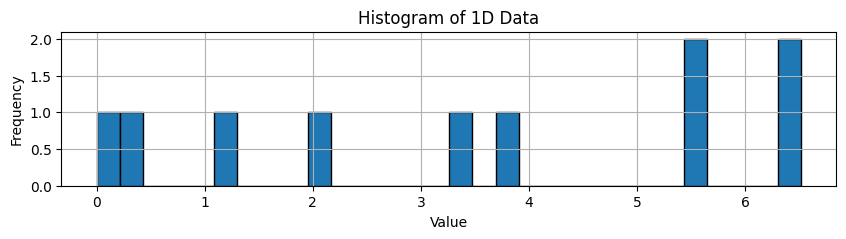

In [575]:
# Plotting histogram
plt.figure(figsize=(10,2))
plt.hist(beta_D_arr_off, bins=30, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of 1D Data')
plt.grid()
plt.show()

In [576]:
exp_bD = np.exp(-beta_D_arr_off)
exp_bD

array([1.        , 0.74090613, 0.31115115, 0.12524347, 0.03160117,
       0.02332488, 0.00412527, 0.00370206, 0.00161994, 0.00147935])

P:[0.00101691 0.00101534 0.00101437 ... 0.         0.         0.        ]
P_sum:1.0


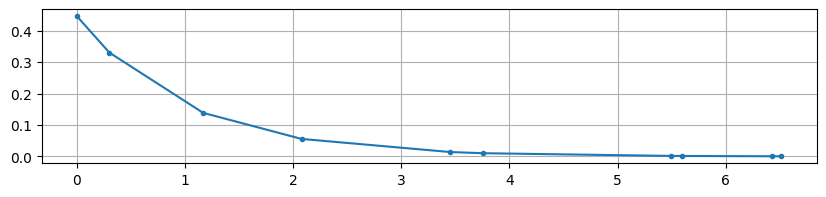

In [577]:
P0_gibbs = exp_bD/np.sum(exp_bD)
print(f"P:{P}")
print(f"P_sum:{np.sum(P)}")

plt.figure(figsize=(10,2))
plt.plot(beta_D_arr_off, P0_gibbs, marker='.')
plt.grid()
plt.show()

### Draw N_D values at random from an exponential distribution with mean 1.

#### Plot the exponential density first 

delta_D:0.0001000001000001


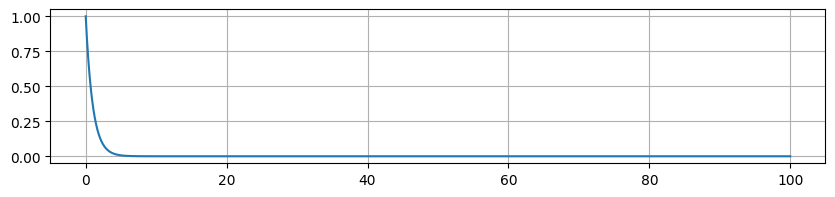

In [139]:
D_max_range_1 = 100 # should be much larger than the maximum value of beta_D_arr
N_steps = int(10000*D_max_range_1)
D_discrete = np.linspace(0.0, D_max_range_1, N_steps)
delta_D = D_discrete[1] - D_discrete[0]
print(f"delta_D:{delta_D}")
exp_density = np.exp(-D_discrete)

plt.figure(figsize=(10,2))
plt.plot(D_discrete, exp_density)
plt.grid()
plt.show()

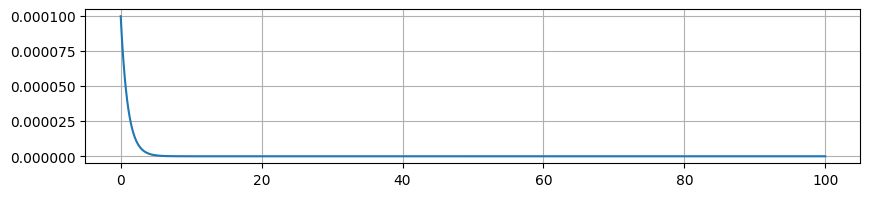

In [140]:
P1 = exp_density * delta_D
P1 = P1/np.sum(P1)
plt.figure(figsize=(10,2))
plt.plot(D_discrete, P1)
plt.grid()
plt.show()

In [149]:
D_arr_1 = np.sort(np.random.choice(a=D_discrete, p=P1, size=10000))
beta_D_max = np.max(beta_D_arr_off)
index = np.searchsorted(D_arr_1, beta_D_max, side='right')
sliced_D_arr_1 = D_arr_1[:index]
sliced_D_arr_1

array([0.        , 0.0001    , 0.0002    , 0.0003    , 0.0008    ,
       0.0008    , 0.0009    , 0.0009    , 0.0009    , 0.0009    ,
       0.0009    , 0.0009    , 0.0011    , 0.0012    , 0.0015    ,
       0.0016    , 0.0018    , 0.0019    , 0.0022    , 0.0022    ,
       0.0022    , 0.0025    , 0.0025    , 0.003     , 0.0032    ,
       0.0033    , 0.0034    , 0.0038    , 0.0038    , 0.004     ,
       0.0042    , 0.0042    , 0.0043    , 0.0046    , 0.0046    ,
       0.0047    , 0.0047    , 0.0048    , 0.0048    , 0.00500001,
       0.00500001, 0.00510001, 0.00510001, 0.00520001, 0.00520001,
       0.00530001, 0.00530001, 0.00560001, 0.00580001, 0.00580001,
       0.00590001, 0.00590001, 0.00590001, 0.00600001, 0.00610001,
       0.00620001, 0.00620001, 0.00620001, 0.00620001, 0.00630001,
       0.00630001, 0.00640001, 0.00650001, 0.00650001, 0.00670001,
       0.00670001, 0.00670001, 0.00670001, 0.00680001, 0.00690001,
       0.00700001, 0.00710001, 0.00710001, 0.00710001, 0.00720

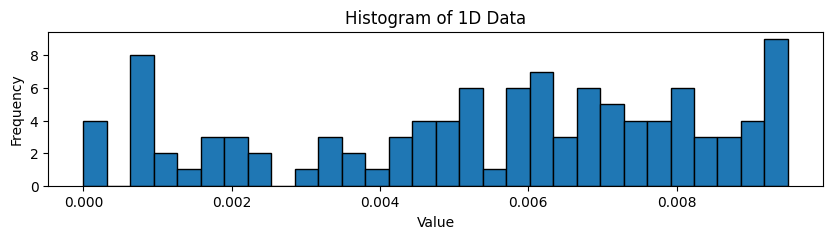

In [150]:
# Plotting histogram
plt.figure(figsize=(10,2))
plt.hist(sliced_D_arr_1, bins=30, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of 1D Data')
plt.show()